## Decision Theory

Define a decision, i.e. an action as
$$a^* = \arg\max_{a}E_{p(s\mid a, knowledge)}[V(s)]$$  
where $s$ is the current state and $V$ is the value function

## Joint Probability

#### Chain rule of probability 
\begin{align*}
p(x_1,...,x_N) &= &p(x_1)&p(x_2|x_1)&...&p(x_N|x_1,...,x_{N-1})\\
2^N-1 &= &1 + &2  + &... + &2^{N-1}&\Rightarrow 2^N - 1
\end{align*}
The number of parameters will be 
#### Number of parameters in a joint distribution
For $p(x_1,...,x_A|y_1,...,y_B)$, the parameters are $$[\text{possible states of } y_1,...,y_B] \times ([\text{possible states of } x_1,...,x_A ] - 1)$$
For binary that will be $2^B\times (2^A - 1)$

#### Conditional Independence 
$A$ and $B$ are conditional independent given $C$, if defined as 
$$A\perp B \mid C\Leftrightarrow P(A,B\mid C) = P(A|C)P(B|C)$$
Note that this is also equivalent to 
$$P(A|B,C)=P(A|C)\Leftrightarrow P(B|A,C)=P(B|C)$$

## Directed Acyclic Graph Models

#### Example

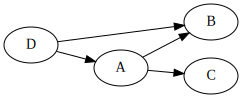

In [9]:
from graphviz import Digraph
dag = Digraph()
dag.edge('D', 'A')
dag.edge('D', 'B')
dag.edge('A', 'B')
dag.edge('A', 'C')
dag.graph_attr['rankdir'] = 'LR'
display(dag);

Let $A,B,C,D$ be binary variables, given the DAG
$${P(A,B,C,D)} = P(D) P(A|D) P(B|A,D) P(C|A)$$
$$15\Leftrightarrow 1+2+4+2=9$$

One simple observation of conditional independence is 
$$X\perp ancestor(X)\mid parents(X)$$

### D-Separation
$X_A\perp X_B\mid X_C$ IFF every variable in $A$ is d-separated from every variable in $B$ given all of $C$, i.e. try to walk from each $A$ to each $B$ where all variables on the path are not conditionally independent. 

#### Chain

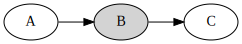

In [12]:
dag = Digraph()
dag.edge('A', 'B')
dag.edge('B', 'C')
dag.node('B', style='filled')
dag.graph_attr['rankdir'] = 'LR'
display(dag);

$$P(A,B,C) = P(A)P(B|A)P(C|B)$$
Determine if $A\perp C|B$, i.e. $P(A,C\mid B) = P(A|B)P(C|B)$

\begin{align*}
P(A,C\mid B) &= \frac{P(A)P(B|A)P(B|C)}{P(B)}\\
&= P(C|B)\frac{P(A,B)}{P(B)}\\
&= P(C|B)P(A|B)
\end{align*}

#### Common Cause

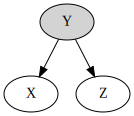

In [13]:
dag = Digraph()
dag.edge('Y','X')
dag.edge('Y','Z')
dag.node('Y', style='filled')
display(dag);

WTS $X\perp Y\mid Y$

\begin{align*}
P(X,Z\mid Y)&= \frac{P(X,Y,Z)}{P(Y)} \\
&= \frac{P(Y)P(X|Y)P(Z|Y)}{P(Y)}\\
&= P(X|Y)P(Z|Y)
\end{align*}

#### Explaining Away

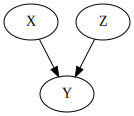

In [18]:
dag = Digraph()
dag.edge('X','Y')
dag.edge('Z','Y')
display(dag);

Given $P(X,Y,Z) = P(X)P(Z)P(Y\mid X,Z)$

Determine if $X\perp Z\equiv P(X,Z)=P(X)P(Z)$
$$P(X,Y) = \frac{P(X,Y,Z)}{P(Y\mid X,Z)} = P(X)P(Z)$$

However, $X\perp Z\mid Y$ does not hold. 

#### Fully dependent

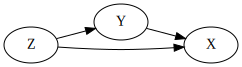

In [24]:
dag = Digraph()
dag.edge('Y','X')
dag.edge('Z','Y')
dag.edge('Z','X')
dag.graph_attr['rankdir'] = 'LR'
display(dag);

Note that this graph corresponds to a fully dependent model

## Bayes' Ball

#### Bayes' Ball Rules

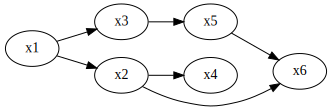

In [26]:
dag = Digraph()
dag.edge('x1', 'x3')
dag.edge('x1', 'x2')
dag.edge('x2', 'x4')
dag.edge('x2', 'x6')
dag.edge('x3', 'x5')
dag.edge('x5', 'x6')
dag.graph_attr['rankdir'] = 'LR'
display(dag);

## Latent Variables
Given some $x_1,...,x_N$ that are dependent, let $z$ be the __latent variables__ such that $x_i$'s are conditionally independent given $z$

#### Example of mixture models

Consider a mixture of linear models, can be fitted with linear regression as 
$$p(y\mid x) = \sum_{z}p(z)N(w_z^T\Phi(X), \sigma_z^2)$$

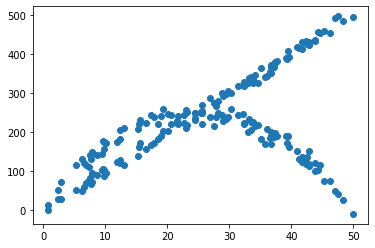

In [53]:
import numpy as np
import matplotlib.pyplot as plt
x= np.random.uniform(0, 50, 100)
y1 = np.random.normal(10*x, 10)
y2 = np.random.normal(-0.4*(x**2) + 20*x, 14)
X = np.concatenate([x, x])
Y = np.concatenate([y1, y2])
plt.scatter(X, Y);

In [57]:
from statsmodels.api import OLS
model1 = OLS(Y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.827
Model:                            OLS   Adj. R-squared (uncentered):              0.826
Method:                 Least Squares   F-statistic:                              952.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):                    8.61e-78
Time:                        16:51:44   Log-Likelihood:                         -1214.5
No. Observations:                 200   AIC:                                      2431.
Df Residuals:                     199   BIC:                                      2434.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.5930      0.246     30.862      0.000       7.108       8.078
==============================================================================
Omnibus:                       70.340   Durbin-Watson:                   1.392
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.481
Skew:                          -1.706   Prob(JB):                     9.44e-33
Kurtosis:                       5.462   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""